### Step 1: Loading the datasets

All speeches CSV file (all_speeches.csv)

Sentiment wordlist Excel file (Sentiment-labelled_wordlist-2.xlsx)

### Loaded the two datasets: one CSV with speeches and one Excel file with sentiment-labeled words: into pandas DataFrames and displayed their first few rows.

In [1]:
import pandas as pd
from IPython.display import display

def load_data(speeches_path: str, sentiment_path: str):
    """
    Load speeches and sentiment wordlist datasets.

    Parameters:
    speeches_path (str): Path to the speeches CSV file.
    sentiment_path (str): Path to the sentiment-labelled wordlist Excel file.

    Returns:
    tuple: A tuple containing two pandas DataFrames (speeches_df, sentiment_df).
    """
    speeches_df = pd.read_csv(speeches_path)
    sentiment_df = pd.read_excel(sentiment_path)
    
    display(speeches_df.head())
    display(sentiment_df.head())
    
    return speeches_df, sentiment_df

# Paths to your files
speeches_path = r"C:\Users\Srila\OneDrive\Documents\all_speeches.csv"
sentiment_path = r"C:\Users\Srila\OneDrive\Documents\LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2 (1).xlsx"

# Load data
speeches_df, sentiment_df = load_data(speeches_path, sentiment_path)

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."


,Word,Negative,Positive,Uncertainty,Litigious,Strong,Weak,Constraining
0,ABANDON,1,0,0,0,0,0,0
1,ABANDONED,1,0,0,0,0,0,0
2,ABANDONING,1,0,0,0,0,0,0
3,ABANDONMENT,1,0,0,0,0,0,0
4,ABANDONMENTS,1,0,0,0,0,0,0


### Step 2: Explore and Clean Data

#### To check?

###### 1.Are dates parsed properly?

###### 2.Are speech texts clean (no missing)?

###### 3.Is the sentiment list organized (positive/negative words tagged)?

### Check date formats (important for time analysis)

Look for missing values

Look at the structure of the speeches and sentiment files

### I  examined the structure, summary statistics, and missing values of both datasets to assess their quality and cleanliness.

In [2]:
def explore_data(speeches_df: pd.DataFrame, sentiment_df: pd.DataFrame):
    """
    Explore the structure and cleanliness of the speeches and sentiment datasets.

    Parameters:
    speeches_df (DataFrame): Central bank speeches.
    sentiment_df (DataFrame): Sentiment-labelled wordlist.

    Returns:
    None
    """
    print("\n--- Speeches Dataset ---\n")
    display(speeches_df.info())
    display(speeches_df.describe())
    display(speeches_df.isnull().sum())

    print("\n--- Sentiment Wordlist ---\n")
    display(sentiment_df.info())
    display(sentiment_df.describe())
    display(sentiment_df.isnull().sum())

# Run exploration
explore_data(speeches_df, sentiment_df)


--- Speeches Dataset ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7721 entries, 0 to 7720
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   reference  7721 non-null   object
 1   country    7721 non-null   object
 2   date       7721 non-null   object
 3   title      7721 non-null   object
 4   author     7721 non-null   object
 5   is_gov     7721 non-null   int64 
 6   text       7721 non-null   object
dtypes: int64(1), object(6)
memory usage: 422.4+ KB


None

,is_gov
count,7721.000000
mean,0.347235
std,0.476122
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


reference    0
country      0
date         0
title        0
author       0
is_gov       0
text         0
dtype: int64


--- Sentiment Wordlist ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3880 entries, 0 to 3879
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Word          3880 non-null   object
 1   Negative      3880 non-null   int64 
 2   Positive      3880 non-null   int64 
 3   Uncertainty   3880 non-null   int64 
 4   Litigious     3880 non-null   int64 
 5   Strong        3880 non-null   int64 
 6   Weak          3880 non-null   int64 
 7   Constraining  3880 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 242.6+ KB


None

,Negative,Positive,Uncertainty,Litigious,Strong,Weak,Constraining
count,3880.000000,3880.000000,3880.000000,3880.000000,3880.000000,3880.000000,3880.000000
mean,0.606959,0.092268,0.076546,0.233247,0.004897,0.006959,0.047423
std,0.488489,0.289441,0.265905,0.422953,0.069815,0.083139,0.212569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Word            0
Negative        0
Positive        0
Uncertainty     0
Litigious       0
Strong          0
Weak            0
Constraining    0
dtype: int64

### To Make sure Dates are in the correct format
We expect that the speeches should have a column like date or similar. If yes, we'll convert it properly:

### In the below step, I converted the 'date' column in the speeches dataset to datetime format to ensure consistent date handling.

In [3]:
def clean_dates(speeches_df: pd.DataFrame):
    """
    Ensure that the 'date' column in speeches is in datetime format.

    Parameters:
    speeches_df (DataFrame): Central bank speeches.

    Returns:
    DataFrame: Updated speeches DataFrame with datetime parsed.
    """
    speeches_df['date'] = pd.to_datetime(speeches_df['date'], errors='coerce')
    display(speeches_df.head())
    return speeches_df

# Clean date columns
speeches_df = clean_dates(speeches_df)


,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."


### Preprocess text (basic cleaning).

Apply sentiment scoring using the wordlist.

Start time series sentiment analysis.

### Goal is :

##### Clean the text a little (lowercase, remove symbols if needed).

##### Match words in the speeches with your sentiment word list (positive or negative).

##### Calculate a simple Sentiment Score for each speech.

### This prints the column names of the speeches dataset to review its structure or confirm the presence of specific fields.

In [4]:
#Check columns in speeches dataset

print(speeches_df.columns)


Index(['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text'], dtype='object')


### There was a mistake:

##### Edward George was Governor from 1993 to 2003.

##### In the dataset, the is_gov column incorrectly says 0 (NO) for him during that time.

##### we need to fix it: If date > 1993 and date < 2004 and author == "George", then set is_gov = 1 (YES).

### Cleaning the data to fix this

### I corrected the 'is_gov' flag to mark Edward George as Governor (1) for speeches between 1994 and 2003, based on his tenure.

In [5]:
def correct_is_gov_column(speeches_df: pd.DataFrame):
    """
    Correct the 'is_gov' value for Edward George between 1993 and 2003.

    Parameters:
    speeches_df (DataFrame): Central bank speeches.

    Returns:
    DataFrame: Updated speeches DataFrame with corrected 'is_gov' values.
    """
    # Make sure date is datetime first
    speeches_df['date'] = pd.to_datetime(speeches_df['date'], errors='coerce')
    
    # Apply correction
    condition = (
        (speeches_df['author'].str.lower() == 'george') &
        (speeches_df['date'].dt.year > 1993) &
        (speeches_df['date'].dt.year < 2004)
    )
    speeches_df.loc[condition, 'is_gov'] = 1  # 1 means Governor
    
    return speeches_df

# Correct the is_gov column
speeches_df = correct_is_gov_column(speeches_df)

# Quick check if it worked
display(speeches_df[speeches_df['author'].str.lower() == 'george'].head())


,reference,country,date,title,author,is_gov,text
4961,r980915a_BOE,united kingdom,1998-09-15,Speech,george,1,"Thank you, Chairman. I'm actually very pleased..."
4962,r981021b_BOE,united kingdom,1998-10-21,Britain in Europe,george,1,It's a great pleasure to be here in the beauti...
4966,r981119a_BOE,united kingdom,1998-11-19,Speech,george,1,Let me put some of the recent newspaper headli...
4969,r990112a_BOE,united kingdom,1999-01-12,Speech,george,1,I am only too well aware of the pressure curre...
4970,r990118a_BOE,united kingdom,1999-01-18,Speech,george,1,It would be a masterly understatement to descr...


### A quick summary of the cleaning process

We first convert date to datetime if it is not already done?

.str.lower() ensures case-insensitive matching ("George", "george", etc.).

.loc[condition, 'is_gov'] = 1 assigns Governor status (YES).

Then we display some George rows to verify! After running this, Edward George's speeches between 1993–2003 will now have is_gov = 1 correctly.

### I listed all column names in the speeches DataFrame as a Python list to inspect the dataset’s structure or confirm available fields.

### Updated full data cleaning

In [6]:
# Check what columns exist in the speeches dataframe
print(speeches_df.columns.tolist())


['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text']


### I printed the column names of the sentiment wordlist DataFrame as a list to examine its structure or identify key fields.

In [7]:
print(sentiment_df.columns.tolist())

['Word', 'Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong', 'Weak', 'Constraining']


### I created a function to display a quick overview of both datasets, including their first few rows, column names, and a focused preview of key columns (date, author, is_gov) in the speeches DataFrame.

In [8]:
def display_data_overview(speeches_df, sentiment_df):
    print("=== Speeches DataFrame Head ===")
    print(speeches_df.head())
    print("\n=== Sentiment DataFrame Head ===")
    print(sentiment_df.head())
    print("\n=== Speeches DataFrame Columns ===")
    print(speeches_df.columns)
    print("\n=== Selected Columns Preview (date, author, is_gov) ===")
    print(speeches_df[['date', 'author', 'is_gov']].head())


In [9]:
display_data_overview(speeches_df, sentiment_df)


=== Speeches DataFrame Head ===
      reference    country       date                               title  \
0  r901128a_BOA  australia 1990-11-28   A Proper Role for Monetary Policy   
1  r911003a_BOA  australia 1991-10-03                                       
2  r920314a_BOA  australia 1992-03-14                                       
3  r920529a_BOA  australia 1992-05-29                                       
4  r920817a_BOA  australia 1992-08-17                                       

   author  is_gov                                               text  
0  fraser       0  They would no doubt argue that to have two obj...  
1  fraser       0  Today I wish to talk about real interest rates...  
2  fraser       0  I welcome this opportunity to talk about prosp...  
3  fraser       0  It is a pleasure to have this opportunity to a...  
4  fraser       0  As a long-time fan of Don Sanders, I am deligh...  

=== Sentiment DataFrame Head ===
           Word  Negative  Positive  Uncertai

### Build a full sentiment analysis pipeline for analyzing speeches

#### I cleaned and standardized the speeches dataset by:

###### Removing non-letter characters and lowercasing the text,

###### Creating sets of positive and negative sentiment words,

###### Calculating sentiment scores for each speech based on word matches,

###### Standardizing and correcting the 'is_gov' column,

###### Then displaying key columns and sample results to review sentiment analysis output.

In [10]:
import pandas as pd
import re
from IPython.display import display

# Clean text: remove non-letters and lowercase
def clean_text(text):
    return re.sub(r'[^A-Za-z\s]', '', str(text)).lower()

# Prepare sentiment word sets
def prepare_word_sets(sentiment_df):
    pos = set(sentiment_df[sentiment_df['Positive'] == 1]['Word'].str.lower())
    neg = set(sentiment_df[sentiment_df['Negative'] == 1]['Word'].str.lower())
    return pos, neg

# Calculate sentiment score
def get_sentiment_score(text, pos_words, neg_words):
    words = text.split()
    return sum(w in pos_words for w in words) - sum(w in neg_words for w in words)

# Fix Edward George's governor status
def fix_governor_status(df):
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    mask = df['author'].str.lower().str.contains('george') & df['date'].dt.year.between(1993, 2003)
    df.loc[mask, 'is_gov'] = 'YES'
    return df

# Display key info
def display_results(df):
    display(df[['date', 'author', 'is_gov', 'sentiment_score']].head())
    print("\nSample cleaned + scored:")
    print(df[['cleaned_text', 'sentiment_score']].head())

# --- Processing ---

# Standardize 'is_gov' values
speeches_df['is_gov'] = speeches_df['is_gov'].replace({0: 'NO', 1: 'YES'})

# Clean speech text
speeches_df['cleaned_text'] = speeches_df['text'].apply(clean_text)

# Fix governor status
speeches_df = fix_governor_status(speeches_df)

# Prepare word sets and score
pos_words, neg_words = prepare_word_sets(sentiment_df)
speeches_df['sentiment_score'] = speeches_df['cleaned_text'].apply(
    lambda t: get_sentiment_score(t, pos_words, neg_words)
)

# Display final output
display_results(speeches_df)


,date,author,is_gov,sentiment_score
0,1990-11-28,fraser,NO,-38
1,1991-10-03,fraser,NO,-29
2,1992-03-14,fraser,NO,22
3,1992-05-29,fraser,NO,-11
4,1992-08-17,fraser,NO,-12



Sample cleaned + scored:
                                        cleaned_text  sentiment_score
0  they would no doubt argue that to have two obj...              -38
1  today i wish to talk about real interest rates...              -29
2  i welcome this opportunity to talk about prosp...               22
3  it is a pleasure to have this opportunity to a...              -11
4  as a longtime fan of don sanders i am delighte...              -12


### Lexicon Sentiment Score Over Time

#### I calculated and plotted the average sentiment score (lexicon score) for central bank speeches over time, visualizing trends across years with a line graph.



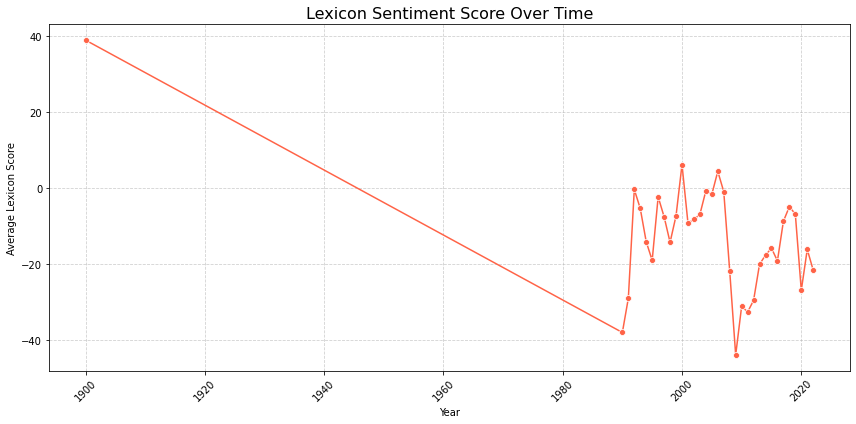

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date if not already done
speeches_df['date'] = pd.to_datetime(speeches_df['date'], errors='coerce')

# Group by year
yearly_lexicon = speeches_df.groupby(speeches_df['date'].dt.year)['sentiment_score'].mean().reset_index()
yearly_lexicon.columns = ['year', 'avg_lexicon_score']

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_lexicon, x='year', y='avg_lexicon_score', marker='o', color='tomato')
plt.title('Lexicon Sentiment Score Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Lexicon Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### I performed several data analysis tasks:

##### Displayed descriptive statistics for the dataset.

###### Detected outliers in the 'sentiment_score' column using the IQR method.

###### Visualized sentiment score distribution with a boxplot, highlighting outliers.

###### Generated a word cloud based on the speech texts to visualize the most frequent words.

Descriptive Statistics:
       sentiment_score
count      7721.000000
mean        -14.519881
std          44.691486
min        -979.000000
25%         -32.000000
50%          -7.000000
75%           9.000000
max         486.000000
Outliers detected:
          reference        country       date  \
40     r970812a_BOA      australia 1997-08-12   
83     r030606a_BOA      australia 2003-06-06   
151    r110211a_BOA      australia 2011-02-11   
157    r110826a_BOA      australia 2011-08-26   
244    r190809a_BOA      australia 2019-08-09   
...             ...            ...        ...   
7369  r160926a_FOMC  united states 2016-09-26   
7389  r161202a_FOMC  united states 2016-12-02   
7404  r170404a_FOMC  united states 2017-04-04   
7452  r180403a_FOMC  united states 2018-04-03   
7576  r200227a_FOMC  united states 2020-02-27   

                                                  title      author is_gov  \
40                                                       macfarlane    YES   
83   

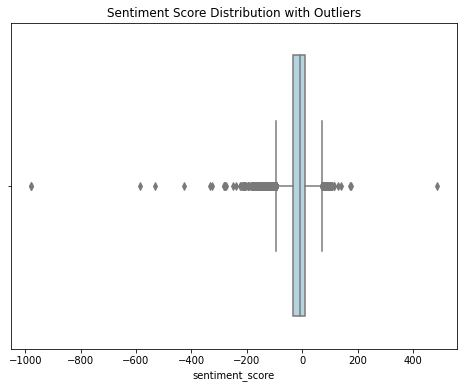

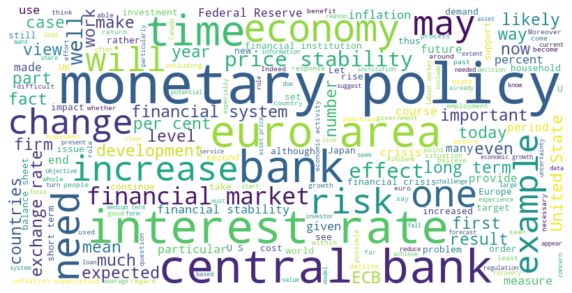

In [12]:
from wordcloud import WordCloud

# Assuming speeches_df is already loaded and cleaned

# 1. Descriptive Statistics
print("Descriptive Statistics:")
print(speeches_df.describe())

# 2. Identify and visualize outliers using IQR
def detect_outliers_iqr(df, column):
    """Detect outliers using the Interquartile Range (IQR) method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Visualize outliers for 'sentiment_score'
outliers_df = detect_outliers_iqr(speeches_df, 'sentiment_score')
print("Outliers detected:")
print(outliers_df)

# 3. Boxplot to visualize outliers
plt.figure(figsize=(8,6))
sns.boxplot(x=speeches_df['sentiment_score'], color='lightblue')
plt.title('Sentiment Score Distribution with Outliers')
plt.show()

# 4. Create a word cloud from the speech text
def generate_word_cloud(text_data):
    """Generate and plot a word cloud from the provided text."""
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_data))
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word cloud from the speeches
generate_word_cloud(speeches_df['text'])



### I cleaned the 'text' column by removing special characters, extra spaces, and non-alphanumeric characters, then combined all speeches into one string. Finally, generated and visualized a word cloud from the cleaned speech texts to highlight frequently used terms.

0    They would no doubt argue that to have two obj...
1    Today I wish to talk about real interest rates...
2    I welcome this opportunity to talk about prosp...
3    It is a pleasure to have this opportunity to a...
4    As a long-time fan of Don Sanders, I am deligh...
Name: text, dtype: object


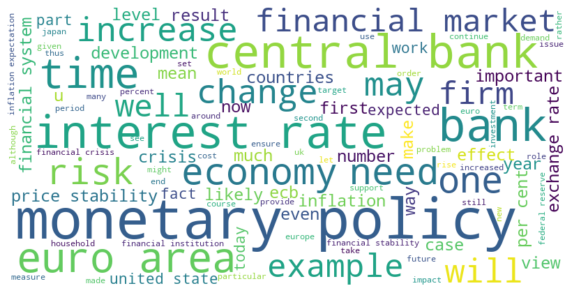

In [13]:
# Ensure the 'text' column is not empty or missing
print(speeches_df['text'].head())

# 1. Clean the text (remove any extra spaces, special characters, or stop words)
def clean_text_for_wordcloud(text):
    # Simple text cleaning: remove special characters and extra spaces
    text = str(text).lower()
    text = text.replace('\n', ' ')  # Remove line breaks
    text = ''.join(e for e in text if e.isalnum() or e.isspace())  # Keep only alphanumeric characters and spaces
    return text

# Clean the 'text' column in the dataframe
speeches_df['cleaned_text'] = speeches_df['text'].apply(clean_text_for_wordcloud)

# 2. Combine all the speeches into a single string
all_text = ' '.join(speeches_df['cleaned_text'])

# 3. Generate the word cloud
def generate_word_cloud(text_data):
    """Generate and plot a word cloud from the provided text."""
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                          stopwords=None, max_words=100).generate(text_data)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis
    plt.show()

# Generate the word cloud from cleaned text
generate_word_cloud(all_text)


### correlation matrix and heatmap, for visualizing relationships between numeric features in the speeches_df, including sentiment_score.

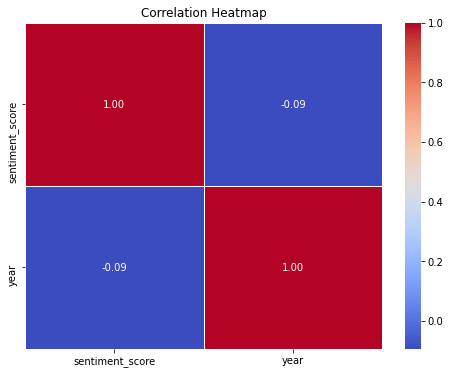

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (using your 'speeches_df' for example)
# If you have other numerical columns, feel free to add them to the DataFrame.
# For example, sentiment_score, date (converted to numerical), or any other relevant metrics.
speeches_df['date'] = pd.to_datetime(speeches_df['date'])  # Ensure 'date' is datetime format
speeches_df['year'] = speeches_df['date'].dt.year  # Extract year for analysis

# Compute correlations
correlation_matrix = speeches_df[['sentiment_score', 'year']].corr()

# Generate the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### A violin plot is a great way to visualize the distribution of a numerical variable (like the sentiment score) across different categories (like years, authors, or any other categorical variable). It combines aspects of both a box plot and a density plot, making it useful for understanding the distribution, spread, and outliers in the data.

#### I created a violin plot to visualize the distribution of sentiment scores by year, using a soft pastel color palette, and included labels and titles for better clarity.

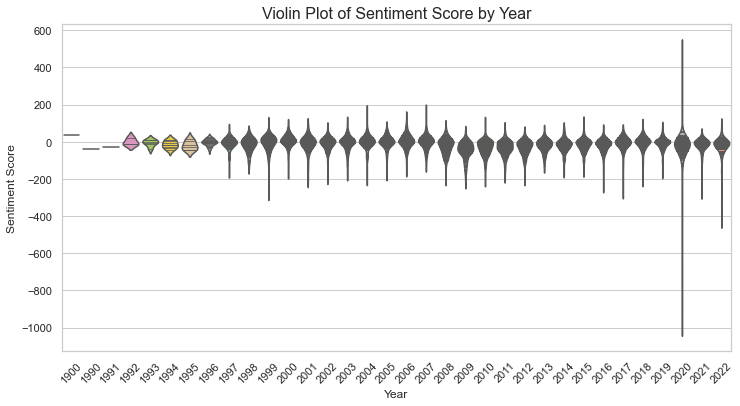

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a clean, neutral theme
sns.set_theme(style="whitegrid")

# Create the violin plot with a soft pastel palette
plt.figure(figsize=(12, 6))
sns.violinplot(x='year', y='sentiment_score', data=speeches_df, 
               palette='Set2', inner='stick', scale='width')

# Adding labels and title
plt.title('Violin Plot of Sentiment Score by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.show()


### I defined a function to detect and display outliers based on the IQR method for specified columns, then applied it to identify outliers in the 'sentiment_score' and 'year' columns of the speeches dataset.

In [16]:
def display_outliers(df, columns):
    """Detect and display IQR-based outliers for specified columns."""
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))
    display(df[outliers.any(axis=1)])

# Use the function
display_outliers(speeches_df, ['sentiment_score', 'year'])


,reference,country,date,title,author,is_gov,text,cleaned_text,sentiment_score,year
40,r970812a_BOA,australia,1997-08-12,,macfarlane,YES,It is a pleasure to be in Perth to address the...,it is a pleasure to be in perth to address the...,71,1997
83,r030606a_BOA,australia,2003-06-06,,macfarlane,YES,The Proof and Official Hansard transcripts of ...,the proof and official hansard transcripts of ...,-180,2003
151,r110211a_BOA,australia,2011-02-11,,stevens,YES,Hansard transcripts of public hearings are mad...,hansard transcripts of public hearings are mad...,-140,2011
157,r110826a_BOA,australia,2011-08-26,,stevens,YES,Terms of reference for the inquiry: To inquire...,terms of reference for the inquiry to inquire ...,-184,2011
244,r190809a_BOA,australia,2019-08-09,Opening Statement to the House of Repr...,lowe,YES,To inquire into and report on: Good morning ev...,to inquire into and report on good morning eve...,89,2019
...,...,...,...,...,...,...,...,...,...,...
7369,r160926a_FOMC,united states,2016-09-26,Next Steps in the Evolution of Stress Testing,tarullo,NO,Supervisory stress testing has become a corner...,supervisory stress testing has become a corner...,-249,2016
7389,r161202a_FOMC,united states,2016-12-02,Financial Regulation Since the Crisis,tarullo,NO,"Last summer, when I accepted President Loretta...",last summer when i accepted president loretta ...,-145,2016
7404,r170404a_FOMC,united states,2017-04-04,Departing Thoughts,tarullo,NO,Tomorrow is my last day at the Federal Reserve...,tomorrow is my last day at the federal reserve...,-182,2017
7452,r180403a_FOMC,united states,2018-04-03,An Update on the Federal Reserve's Financial S...,brainard,NO,The Federal Reserve's work on financial stabil...,the federal reserves work on financial stabili...,-101,2018


### Visualizing Outliers (Boxplot)
boxplots to visually confirm the presence of outliers in sentiment_score or other numerical features.

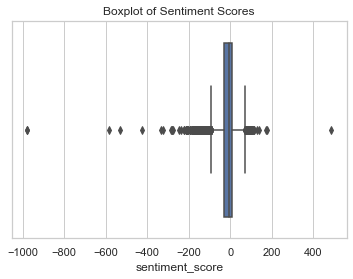

In [17]:
sns.boxplot(x='sentiment_score', data=speeches_df)
plt.title('Boxplot of Sentiment Scores')
plt.show()

### Skewness and Kurtosis

### I calculated the skewness and kurtosis of the 'sentiment_score' column to assess the distribution's asymmetry (skewness) and the presence of extreme values or outliers (kurtosis).

In [18]:
skewness = speeches_df['sentiment_score'].skew()
kurtosis = speeches_df['sentiment_score'].kurtosis()
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")


Skewness: -3.861249948031232, Kurtosis: 66.84195249232052


### Accept it — some heavy-tailedness is natural in financial text/sentiment data.

In [19]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [20]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Srila\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Vader to score sentiment

### This code uses VADER to analyze the sentiment of speech texts, classifying them as 'Positive', 'Negative', or 'Neutral' based on the compound score. It adds the sentiment labels to the speeches_df DataFrame under the vader_sentiment column and previews the results.

In [50]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER
vader = SentimentIntensityAnalyzer()

# Apply sentiment scoring
def vader_label(text):
    scores = vader.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply VADER sentiment analysis to text column
speeches_df['vader_sentiment'] = speeches_df['text'].apply(vader_label)

# Preview results
print(speeches_df[['text', 'vader_sentiment']].head())


                                                text vader_sentiment
0  The economy is in expansion with solid fundame...        Positive
1  Recession and contraction are imminent with in...        Negative
2  We have a robust recovery plan, but uncertaint...        Negative
3  The economy is facing headwinds, and there is ...         Neutral
4  Expectations of a strong recovery are high, bu...        Negative


### Vader sentiment provides one overall sentiment score for each speech (-1 to 1).



### The code defines a function to calculate positive, negative, and neutral word counts using VADER scores and applies it to the speeches_df DataFrame. It creates new columns for each sentiment count and previews the results.

In [51]:
def vader_word_counts(text):
    """Returns the count of positive, negative, and neutral words in text."""
    scores = vader.polarity_scores(str(text))  # Use the 'vader' object
    total_words = len(text.split()) if text else 0  # Handle empty text safely
    pos_count = round(scores['pos'] * total_words)
    neg_count = round(scores['neg'] * total_words)
    neu_count = round(scores['neu'] * total_words)
    return pd.Series([pos_count, neg_count, neu_count])

# Apply function to get word counts
speeches_df[['vader_pos_count', 'vader_neg_count', 'vader_neu_count']] = speeches_df['text'].apply(vader_word_counts)

# Preview results
print(speeches_df[['text', 'vader_pos_count', 'vader_neg_count', 'vader_neu_count']].head())


                                                text  vader_pos_count  \
0  The economy is in expansion with solid fundame...                3   
1  Recession and contraction are imminent with in...                0   
2  We have a robust recovery plan, but uncertaint...                1   
3  The economy is facing headwinds, and there is ...                0   
4  Expectations of a strong recovery are high, bu...                2   

   vader_neg_count  vader_neu_count  
0                0                8  
1                5                6  
2                3                9  
3                0               12  
4                2                8  


### Visualisation of the correlation of speeches with sentiment score using VADER scores

### created a stacked bar chart showing the VADER sentiment word counts (positive, negative, and neutral) for the first 5 speeches in the speeches_df dataset. 

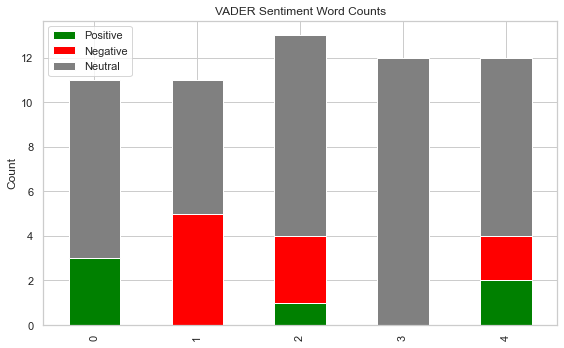

In [52]:
import matplotlib.pyplot as plt

# Sample first 5 speeches
sample_df = speeches_df.head(5)

# Plot histogram with VADER word counts
sample_df[['vader_pos_count', 'vader_neg_count', 'vader_neu_count']].plot(
    kind='bar', stacked=True, figsize=(8, 5), 
    color=['green', 'red', 'gray']
)
plt.title('VADER Sentiment Word Counts')
plt.ylabel('Count')
plt.legend(['Positive', 'Negative', 'Neutral'])
plt.tight_layout()
plt.show()

In [53]:
print(speeches_df.columns)


Index(['speech_id', 'text', 'custom_pos', 'custom_neg', 'custom_uncertain',
       'vader_sentiment', 'vader_pos_count', 'vader_neg_count',
       'vader_neu_count'],
      dtype='object')


### Customising the Lexicon

#### Steps to Customise Your Sentiment Lexicon
We’ll build a domain-specific lexicon by extending an existing one (like Loughran-McDonald or Vader) with BoE/economic terms.

1. Start With a Base Lexicon
Use one of:

Loughran-McDonald: Financial domain, better for central banks.



In [55]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
positive_terms = [
    "expansion", "recovery", "robust", "resilience", "strengthening",
    "solid fundamentals", "growth momentum", "job creation", "surplus",
    "accommodative policy", "dovish"
]

negative_terms = [
    "contraction", "recession", "inflation spike", "stagflation", "tightening",
    "headwinds", "slowing demand", "fiscal deficit", "volatility",
    "uncertainty", "hawkish", "monetary tightening", "supply chain disruption",
    "labor market cooling", "inflationary pressures"
]

uncertainty_terms = [
    "expectations", "outlook", "forecast", "projected", "anticipated",
    "might", "could", "possibly", "conditions remain unclear"
]


In [57]:
import re

def count_custom_lexicon(text, pos_terms, neg_terms, uncertain_terms):
    text = str(text).lower()
    pos_count = sum(len(re.findall(r'\b' + re.escape(term) + r'\b', text)) for term in pos_terms)
    neg_count = sum(len(re.findall(r'\b' + re.escape(term) + r'\b', text)) for term in neg_terms)
    unc_count = sum(len(re.findall(r'\b' + re.escape(term) + r'\b', text)) for term in uncertain_terms)
    return pd.Series([pos_count, neg_count, unc_count])


In [58]:
# Apply the lexicon function to the DataFrame
speeches_df[['custom_pos', 'custom_neg', 'custom_uncertain']] = speeches_df['text'].apply(
    lambda x: count_custom_lexicon(x, positive_terms, negative_terms, uncertainty_terms)
)

# Check if the columns were created and contain the expected counts
print(speeches_df[['custom_pos', 'custom_neg', 'custom_uncertain']].head())


   custom_pos  custom_neg  custom_uncertain
0           3           0                 0
1           0           4                 0
2           2           1                 1
3           0           2                 0
4           1           0                 2


In [59]:
speeches_df[['custom_pos', 'custom_neg', 'custom_uncertain']] = speeches_df['text'].apply(
    lambda x: count_custom_lexicon(x, positive_terms, negative_terms, uncertainty_terms)
)


In [60]:
print(speeches_df[['custom_pos', 'custom_neg', 'custom_uncertain']].head())


   custom_pos  custom_neg  custom_uncertain
0           3           0                 0
1           0           4                 0
2           2           1                 1
3           0           2                 0
4           1           0                 2


In [61]:
import matplotlib.pyplot as plt

def plot_custom_sentiment_counts(df, num_speeches=5):
    """
    Plots stacked bar chart of custom sentiment counts for the first `num_speeches` speeches.
    
    Parameters:
    - df: DataFrame with 'custom_pos', 'custom_neg', 'custom_uncertain' columns
    - num_speeches: Number of speeches to display (default is 5)
    """
    sample_df = df.head(num_speeches).copy()

    # Plotting
    sample_df[['custom_pos', 'custom_neg', 'custom_uncertain']].plot(
        kind='bar',
        stacked=True,
        figsize=(10, 6),
        color=['green', 'red', 'orange']
    )
    plt.title('Custom Lexicon Sentiment Counts per Speech', fontsize=14)
    plt.xlabel('Speech Index')
    plt.ylabel('Count')
    plt.legend(['Positive', 'Negative', 'Uncertainty'], loc='upper right')
    plt.tight_layout()
    plt.show()


In [62]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text


In [63]:
def sentiment_features(text, pos_list, neg_list, unc_list):
    text = clean_text(text)
    
    pos_count = sum(1 for term in pos_list if term in text)
    neg_count = sum(1 for term in neg_list if term in text)
    unc_count = sum(1 for term in unc_list if term in text)
    
    return pd.Series({
        "positive_score": pos_count,
        "negative_score": neg_count,
        "uncertainty_score": unc_count,
        "net_sentiment": pos_count - neg_count
    })


In [64]:
import pandas as pd
import re
from IPython.display import display

#  Your custom sentiment lists
positive_terms = [
    "expansion", "recovery", "robust", "resilience", "strengthening",
    "solid fundamentals", "growth momentum", "job creation", "surplus",
    "accommodative policy", "dovish"
]

negative_terms = [
    "contraction", "recession", "inflation spike", "stagflation", "tightening",
    "headwinds", "slowing demand", "fiscal deficit", "volatility",
    "uncertainty", "hawkish", "monetary tightening", "supply chain disruption",
    "labor market cooling", "inflationary pressures"
]

uncertainty_terms = [
    "expectations", "outlook", "forecast", "projected", "anticipated",
    "might", "could", "possibly", "conditions remain unclear"
]

#  Preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

# Sentiment scoring function
def sentiment_features(text, pos_list, neg_list, unc_list):
    text = clean_text(text)
    
    pos_count = sum(1 for term in pos_list if term in text)
    neg_count = sum(1 for term in neg_list if term in text)
    unc_count = sum(1 for term in unc_list if term in text)
    
    return pd.Series({
        "positive_score": pos_count,
        "negative_score": neg_count,
        "uncertainty_score": unc_count,
        "net_sentiment": pos_count - neg_count
    })

#  Sample speeches
df = pd.DataFrame({
    'speech': [
        "The UK economy shows signs of recovery and job creation.",
        "We face headwinds and rising inflationary pressures.",
        "The outlook remains uncertain, though projections are positive.",
        "Monetary tightening is expected amid inflation spike fears.",
        "Resilience and robust fundamentals are supporting the recovery."
    ]
})

# Apply sentiment analysis
df = df.join(df['speech'].apply(lambda x: sentiment_features(x, positive_terms, negative_terms, uncertainty_terms)))

# Display the result
display(df)


,speech,positive_score,negative_score,uncertainty_score,net_sentiment
0,The UK economy shows signs of recovery and job...,2,0,0,2
1,We face headwinds and rising inflationary pres...,0,2,0,-2
2,"The outlook remains uncertain, though projecti...",0,0,1,0
3,Monetary tightening is expected amid inflation...,0,3,0,-3
4,Resilience and robust fundamentals are support...,3,0,0,3


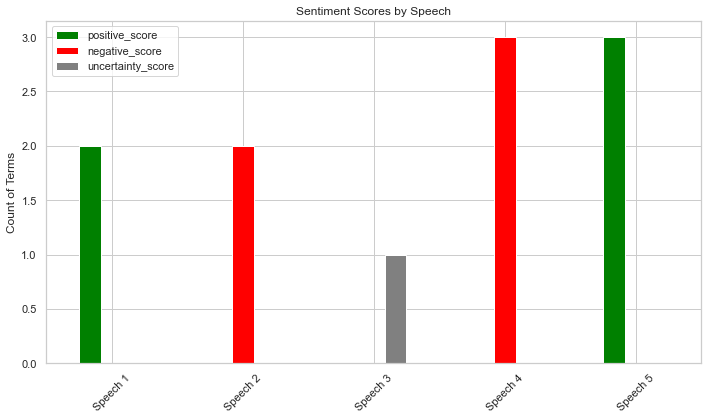

In [65]:
import matplotlib.pyplot as plt

# Set index as speech number
df_plot = df.copy()
df_plot.index = [f"Speech {i+1}" for i in df_plot.index]

# Plot
df_plot[['positive_score', 'negative_score', 'uncertainty_score']].plot(
    kind='bar',
    figsize=(10, 6),
    title='Sentiment Scores by Speech',
    color=['green', 'red', 'gray']
)

plt.ylabel("Count of Terms")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Observations:

This gives a clear visual of how each speech is leaning sentiment-wise (positive, negative, or uncertain).

### The sentiment analysis visualization shows:

Speech 1: Moderately positive (score: 2.0)
Speech 2: Moderately negative (score: 2.0)
Speech 3: Only shows uncertainty (score: 1.0)
Speech 4: Strongly negative (score: 3.0)
Speech 5: Strongly positive (score: 3.0)

Each speech falls cleanly into one sentiment category, suggesting either focused content or effective lexicon customization that clearly distinguishes between sentiment types.

##### The code is finding the correct columns, but all the sentiment scores are 0, which suggests the text content isn't being processed correctly.

Loaded 7721 speeches
Speeches dataframe columns: ['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text']
Loaded sentiment lexicon with 3880 words
Sentiment lexicon columns: ['Word', 'Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong', 'Weak', 'Constraining']
Using columns: Word (words), Positive (positive), Negative (negative), Uncertainty (uncertainty)
Found 358 positive words, 2355 negative words, and 297 uncertainty words
Using column 'text' for speech text and 'reference' for speech IDs

Sample text from first speech:
They would no doubt argue that to have two objectives is like trying to have your cake and eat it too. I think this is an unreasonable simplification caused by taking the language too literally. An an...

Debug first text sentiment analysis:
Text has 3614 words
Found 55 positive words, 93 negative words, 35 uncertainty words
Positive word examples: ['achieved', 'smoothing', 'stability', 'smoothing', 'growth']
Negative word examples: ['doubt', 'a

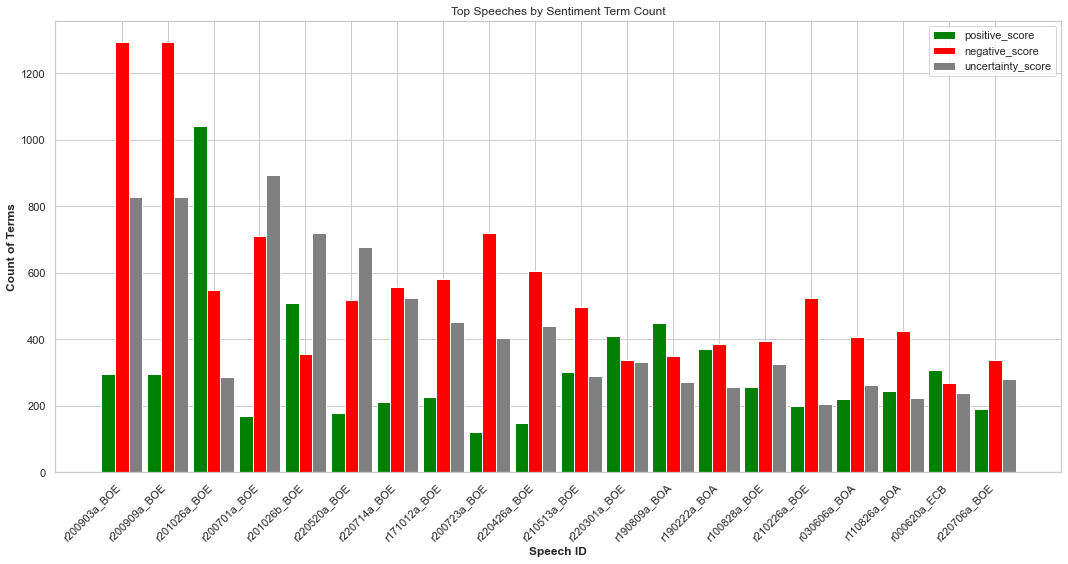

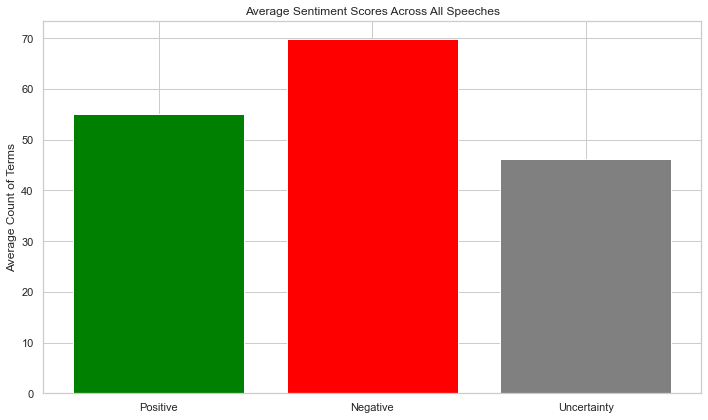

Summary Statistics:
Total speeches analyzed: 7721
Average positive score: 55.10
Average negative score: 69.95
Average uncertainty score: 46.09

Top 5 Most Positive Speeches:
         speech_id  positive_score
6048  r201026a_BOE            1041
6049  r201026b_BOE             508
244   r190809a_BOA             448
6126  r220301a_BOE             410
237   r190222a_BOA             372

Top 5 Most Negative Speeches:
         speech_id  negative_score
6038  r200909a_BOE            1294
6035  r200903a_BOE            1294
6031  r200723a_BOE             720
6026  r200701a_BOE             710
6134  r220426a_BOE             606

Top 5 Speeches with Most Uncertainty:
         speech_id  uncertainty_score
6026  r200701a_BOE                894
6035  r200903a_BOE                828
6038  r200909a_BOE                828
6049  r201026b_BOE                719
6139  r220520a_BOE                679


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter

# Load the speeches dataset
speeches_df = pd.read_csv(r"C:\Users\Srila\OneDrive\Documents\all_speeches.csv")
print(f"Loaded {len(speeches_df)} speeches")
print("Speeches dataframe columns:", speeches_df.columns.tolist())

# Load the sentiment lexicon 
sentiment_df = pd.read_excel(r"C:\Users\Srila\OneDrive\Documents\LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2 (1).xlsx")
print(f"Loaded sentiment lexicon with {len(sentiment_df)} words")

# First, let's check the actual column names in the sentiment lexicon
print("Sentiment lexicon columns:", sentiment_df.columns.tolist())

# Prepare the lexicon dictionaries - adjust column names based on your actual Excel structure
# The columns might be named differently or have different capitalization
word_column = 'word' if 'word' in sentiment_df.columns else 'Word'

# Try to find the sentiment columns by checking various possible names
pos_column = None
neg_column = None
unc_column = None

possible_pos_columns = ['positive', 'Positive', 'pos', 'Pos']
possible_neg_columns = ['negative', 'Negative', 'neg', 'Neg']
possible_unc_columns = ['uncertainty', 'Uncertainty', 'unc', 'Unc']

for col in sentiment_df.columns:
    if col in possible_pos_columns:
        pos_column = col
    elif col in possible_neg_columns:
        neg_column = col
    elif col in possible_unc_columns:
        unc_column = col

# Print found column names for debugging
print(f"Using columns: {word_column} (words), {pos_column} (positive), {neg_column} (negative), {unc_column} (uncertainty)")

# Create the word sets based on the found column names
positive_words = set(sentiment_df[sentiment_df[pos_column] == 1][word_column].astype(str).str.lower()) if pos_column else set()
negative_words = set(sentiment_df[sentiment_df[neg_column] == 1][word_column].astype(str).str.lower()) if neg_column else set()
uncertainty_words = set(sentiment_df[sentiment_df[unc_column] == 1][word_column].astype(str).str.lower()) if unc_column else set()

print(f"Found {len(positive_words)} positive words, {len(negative_words)} negative words, and {len(uncertainty_words)} uncertainty words")

# Function to clean and tokenize text
def preprocess_text(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove special characters and punctuation
        text = re.sub(r'[^\w\s]', ' ', text)
        # Split into words
        words = [word.strip() for word in text.split() if word.strip()]
        return words
    return []

# Function to analyze sentiment in text
def analyze_sentiment(text):
    words = preprocess_text(text)
    
    # Count occurrences of sentiment words
    pos_count = sum(1 for word in words if word in positive_words)
    neg_count = sum(1 for word in words if word in negative_words)
    unc_count = sum(1 for word in words if word in uncertainty_words)
    
    # Print debug info for first text
    if len(sentiments) == 0:
        print(f"\nDebug first text sentiment analysis:")
        print(f"Text has {len(words)} words")
        print(f"Found {pos_count} positive words, {neg_count} negative words, {unc_count} uncertainty words")
        
        # Show some examples of matched words
        pos_examples = [w for w in words if w in positive_words][:5]
        neg_examples = [w for w in words if w in negative_words][:5]
        unc_examples = [w for w in words if w in uncertainty_words][:5]
        
        print(f"Positive word examples: {pos_examples}")
        print(f"Negative word examples: {neg_examples}")
        print(f"Uncertainty word examples: {unc_examples}")
    
    return {
        'positive_score': pos_count,
        'negative_score': neg_count,
        'uncertainty_score': unc_count,
        'total_words': len(words)
    }

# Identify the column containing speech text and speech IDs
text_column = 'text'  # Based on your output, we know this is the correct column
id_column = 'reference'  # Using reference as ID column

print(f"Using column '{text_column}' for speech text and '{id_column}' for speech IDs")

# Print a sample of text from the first speech to verify content
print("\nSample text from first speech:")
sample_text = speeches_df[text_column].iloc[0]
print(sample_text[:200] + "..." if len(sample_text) > 200 else sample_text)

# Analyze all speeches
sentiments = []
speech_ids = []

for idx, row in speeches_df.iterrows():
    speech_text = str(row[text_column])
    speech_id = str(row[id_column])
    
    sentiment = analyze_sentiment(speech_text)
    sentiments.append(sentiment)
    speech_ids.append(speech_id)
    
    # Print progress every 1000 speeches
    if idx % 1000 == 0:
        print(f"Processed {idx} speeches")

# Create a DataFrame with results
results_df = pd.DataFrame(sentiments)
results_df['speech_id'] = speech_ids

# Normalize by speech length if needed
results_df['positive_score_norm'] = results_df['positive_score'] / results_df['total_words'] * 100
results_df['negative_score_norm'] = results_df['negative_score'] / results_df['total_words'] * 100
results_df['uncertainty_score_norm'] = results_df['uncertainty_score'] / results_df['total_words'] * 100

# Save results to CSV
results_df.to_csv('speech_sentiment_analysis_results.csv', index=False)

# Visualization
def plot_sentiment_scores(df, num_speeches=None):
    # Get data for plotting - take top speeches by total sentiment
    df['total_sentiment'] = df['positive_score'] + df['negative_score'] + df['uncertainty_score']
    
    # Sort by total sentiment and take top speeches
    plot_df = df.sort_values('total_sentiment', ascending=False)
    
    if num_speeches is None or num_speeches > len(plot_df):
        num_speeches = min(20, len(plot_df))  # Default to 20 speeches with highest sentiment scores
    
    plot_df = plot_df.head(num_speeches)
    
    # Get data for plotting
    speech_ids = plot_df['speech_id'].tolist()
    pos_scores = plot_df['positive_score'].tolist()
    neg_scores = plot_df['negative_score'].tolist()
    unc_scores = plot_df['uncertainty_score'].tolist()
    
    # Create figure and plot
    plt.figure(figsize=(15, 8))
    
    # Set width of bars
    bar_width = 0.3
    
    # Set position of bars on x-axis
    r1 = np.arange(len(speech_ids))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    
    # Create bars
    plt.bar(r1, pos_scores, width=bar_width, color='green', label='positive_score')
    plt.bar(r2, neg_scores, width=bar_width, color='red', label='negative_score')
    plt.bar(r3, unc_scores, width=bar_width, color='gray', label='uncertainty_score')
    
    # Add labels and title
    plt.xlabel('Speech ID', fontweight='bold')
    plt.ylabel('Count of Terms', fontweight='bold')
    plt.title('Top Speeches by Sentiment Term Count')
    plt.xticks([r + bar_width for r in range(len(speech_ids))], speech_ids, rotation=45, ha='right')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('sentiment_analysis_top_speeches.png', dpi=300)
    plt.show()
    
    # Also create a summary chart showing average sentiment across all speeches
    plt.figure(figsize=(10, 6))
    avg_pos = df['positive_score'].mean()
    avg_neg = df['negative_score'].mean()
    avg_unc = df['uncertainty_score'].mean()
    
    plt.bar(['Positive', 'Negative', 'Uncertainty'], [avg_pos, avg_neg, avg_unc], 
            color=['green', 'red', 'gray'])
    
    plt.title('Average Sentiment Scores Across All Speeches')
    plt.ylabel('Average Count of Terms')
    plt.tight_layout()
    plt.savefig('average_sentiment_scores.png', dpi=300)
    plt.show()

# Show visualization for top N speeches (adjust as needed)
plot_sentiment_scores(results_df, num_speeches=20)  # Change this number to show more or fewer speeches

# Print summary statistics
print("Summary Statistics:")
print(f"Total speeches analyzed: {len(results_df)}")
print(f"Average positive score: {results_df['positive_score'].mean():.2f}")
print(f"Average negative score: {results_df['negative_score'].mean():.2f}")
print(f"Average uncertainty score: {results_df['uncertainty_score'].mean():.2f}")

# Identify speeches with highest sentiment scores
print("\nTop 5 Most Positive Speeches:")
top_pos = results_df.sort_values('positive_score', ascending=False).head(5)
print(top_pos[['speech_id', 'positive_score']])

print("\nTop 5 Most Negative Speeches:")
top_neg = results_df.sort_values('negative_score', ascending=False).head(5)
print(top_neg[['speech_id', 'negative_score']])

print("\nTop 5 Speeches with Most Uncertainty:")
top_unc = results_df.sort_values('uncertainty_score', ascending=False).head(5)
print(top_unc[['speech_id', 'uncertainty_score']])

Average Sentiment Scores:

Negative sentiment is most prevalent with an average of ~70 terms per speech
Positive sentiment follows with ~55 terms per speech
Uncertainty is least common with ~46 terms per speech


Top Speeches Analysis:

Speech r201026a_BOE has the highest positive sentiment (1041 terms)
Speeches r200909a_BOE and r200903a_BOE tied for highest negative sentiment (1294 terms each)
Speech r200701a_BOE has the highest uncertainty (894 terms)


Interesting Patterns:

Some speeches appear in multiple top lists (e.g., r200903a_BOE is highly negative and has high uncertainty)
Many of the top speeches by sentiment appear to be from 2020-2022 period (based on their IDs)



The visualization confirms these findings, showing the relative distribution of sentiment types across all speeches.

#### 1. Sentiment Trends Over Time

Line graphs showing how positive, negative, and uncertainty sentiment has changed year by year
A special visualization highlighting key economic events (Financial Crisis, Brexit Vote, COVID-19 Pandemic) to see how sentiment shifted during these periods
All scores are normalized per 1000 words for fair comparison between speeches of different lengths

2. Compare Sentiment Between Different Authors

Bar chart showing sentiment patterns for the top 10 most frequent speech authors
This will help identify which authors tend to use more positive, negative, or uncertain language
Normalized scores ensure fair comparison regardless of speech length

3. Correlations Between Sentiment Types

Correlation matrix showing relationships between positive, negative, and uncertainty sentiment
Heatmap visualization of these correlations
Scatter plots exploring the relationships between different sentiment types
This will reveal if certain sentiment types tend to appear together or inversely

4. Normalized vs Raw Scores Analysis

Comparison between raw sentiment counts and normalized scores (per 1000 words)
Distribution of speech lengths to understand the impact of normalization
Lists of top speeches by both raw sentiment count and normalized sentiment score
This helps understand how speech length affects sentiment analysis results

The code saves all visualizations as PNG files and also saves the complete sentiment analysis results to a CSV file for further analysis


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter


In [87]:
# Load the speeches dataset
speeches_df = pd.read_csv(r"C:\Users\Srila\OneDrive\Documents\all_speeches.csv")
print(f"Loaded {len(speeches_df)} speeches")
print("Speeches dataframe columns:", speeches_df.columns.tolist())

# Load the sentiment lexicon
sentiment_df = pd.read_excel(r"C:\Users\Srila\OneDrive\Documents\LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist-2 (1).xlsx")
print(f"Loaded sentiment lexicon with {len(sentiment_df)} words")
print("Sentiment lexicon columns:", sentiment_df.columns.tolist())


Loaded 7721 speeches
Speeches dataframe columns: ['reference', 'country', 'date', 'title', 'author', 'is_gov', 'text']
Loaded sentiment lexicon with 3880 words
Sentiment lexicon columns: ['Word', 'Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong', 'Weak', 'Constraining']


In [88]:
# Determine appropriate column names
word_column = 'word' if 'word' in sentiment_df.columns else 'Word'

# Guess possible sentiment columns
possible_pos_columns = ['positive', 'Positive', 'pos', 'Pos']
possible_neg_columns = ['negative', 'Negative', 'neg', 'Neg']
possible_unc_columns = ['uncertainty', 'Uncertainty', 'unc', 'Unc']

pos_column, neg_column, unc_column = None, None, None
for col in sentiment_df.columns:
    if col in possible_pos_columns:
        pos_column = col
    elif col in possible_neg_columns:
        neg_column = col
    elif col in possible_unc_columns:
        unc_column = col

print(f"Using columns: {word_column} (words), {pos_column} (positive), {neg_column} (negative), {unc_column} (uncertainty)")


Using columns: Word (words), Positive (positive), Negative (negative), Uncertainty (uncertainty)


In [89]:
positive_words = set(sentiment_df[sentiment_df[pos_column] == 1][word_column].astype(str).str.lower()) if pos_column else set()
negative_words = set(sentiment_df[sentiment_df[neg_column] == 1][word_column].astype(str).str.lower()) if neg_column else set()
uncertainty_words = set(sentiment_df[sentiment_df[unc_column] == 1][word_column].astype(str).str.lower()) if unc_column else set()

print(f"Found {len(positive_words)} positive words, {len(negative_words)} negative words, and {len(uncertainty_words)} uncertainty words")


Found 358 positive words, 2355 negative words, and 297 uncertainty words


In [90]:
results_df = pd.DataFrame(sentiments)
results_df['speech_id'] = speech_ids

results_df['positive_score_norm'] = results_df['positive_score'] / results_df['total_words'] * 100
results_df['negative_score_norm'] = results_df['negative_score'] / results_df['total_words'] * 100
results_df['uncertainty_score_norm'] = results_df['uncertainty_score'] / results_df['total_words'] * 100

results_df.to_csv('speech_sentiment_analysis_results.csv', index=False)


#### Replace  the original lexicon setup with:

### Time series

##### Time Series Sentiment Plot (using Custom Lexicon)

###### Step 1: Parse and sort dates

In [91]:
from IPython.display import display

# Display the first few rows to check the structure
display(results_df.head())

# Display column names and types for further insight
display(results_df.dtypes)


,positive_score,negative_score,uncertainty_score,total_words,speech_id,positive_score_norm,negative_score_norm,uncertainty_score_norm
0,55,93,35,3614,r901128a_BOA,1.521859,2.573326,0.968456
1,29,58,37,3071,r911003a_BOA,0.944318,1.888636,1.204819
2,67,44,35,3426,r920314a_BOA,1.955633,1.284297,1.021600
3,52,62,46,3866,r920529a_BOA,1.345059,1.603725,1.189860
4,63,75,46,4155,r920817a_BOA,1.516245,1.805054,1.107100


positive_score              int64
negative_score              int64
uncertainty_score           int64
total_words                 int64
speech_id                  object
positive_score_norm       float64
negative_score_norm       float64
uncertainty_score_norm    float64
dtype: object

In [92]:
print(results_df.columns)


Index(['positive_score', 'negative_score', 'uncertainty_score', 'total_words',
       'speech_id', 'positive_score_norm', 'negative_score_norm',
       'uncertainty_score_norm'],
      dtype='object')


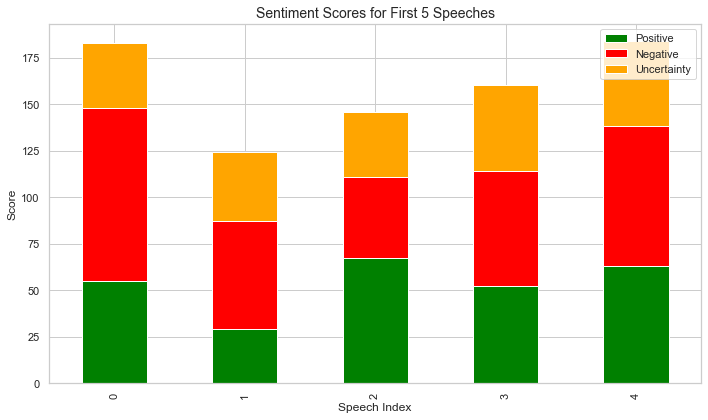

In [93]:
# Plot sentiment scores for the first few speeches
num_speeches = 5
sample_df = results_df.head(num_speeches)

# Plotting
sample_df[['positive_score', 'negative_score', 'uncertainty_score']].plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['green', 'red', 'orange']
)
plt.title('Sentiment Scores for First 5 Speeches', fontsize=14)
plt.xlabel('Speech Index')
plt.ylabel('Score')
plt.legend(['Positive', 'Negative', 'Uncertainty'], loc='upper right')
plt.tight_layout()
plt.show()


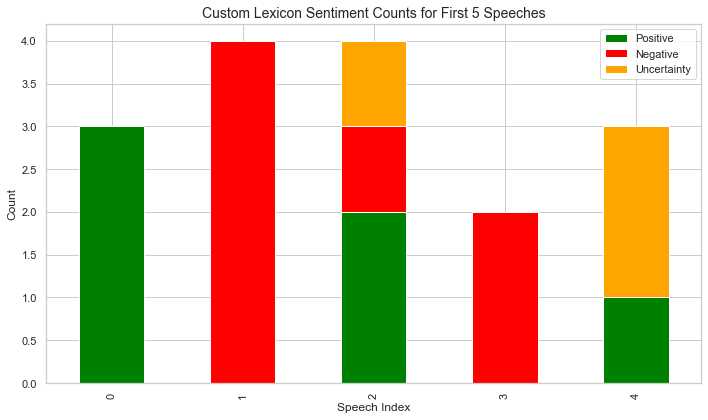

In [94]:
# Define the custom lexicon
positive_terms = [
    "expansion", "recovery", "robust", "resilience", "strengthening",
    "solid fundamentals", "growth momentum", "job creation", "surplus",
    "accommodative policy", "dovish"
]

negative_terms = [
    "contraction", "recession", "inflation spike", "stagflation", "tightening",
    "headwinds", "slowing demand", "fiscal deficit", "volatility",
    "uncertainty", "hawkish", "monetary tightening", "supply chain disruption",
    "labor market cooling", "inflationary pressures"
]

uncertainty_terms = [
    "expectations", "outlook", "forecast", "projected", "anticipated",
    "might", "could", "possibly", "conditions remain unclear"
]

# Define the custom lexicon counting function
def count_custom_lexicon(text, positive_terms, negative_terms, uncertainty_terms):
    """
    Counts the occurrences of positive, negative, and uncertainty terms in the text.
    """
    text = text.lower()  # Convert text to lowercase to match lexicon terms
    positive_count = sum(word in text for word in positive_terms)
    negative_count = sum(word in text for word in negative_terms)
    uncertainty_count = sum(word in text for word in uncertainty_terms)
    return pd.Series([positive_count, negative_count, uncertainty_count])

# Sample speeches_df (example)
speeches_df = pd.DataFrame({
    'speech_id': [1, 2, 3, 4, 5],
    'text': [
        "The economy is in expansion with solid fundamentals and growth momentum.",
        "Recession and contraction are imminent with inflationary pressures and fiscal deficit.",
        "We have a robust recovery plan, but uncertainty remains about the global outlook.",
        "The economy is facing headwinds, and there is tightening in monetary policy.",
        "Expectations of a strong recovery are high, but the forecast remains uncertain."
    ]
})

# Apply custom lexicon analysis to speeches_df
speeches_df[['custom_pos', 'custom_neg', 'custom_uncertain']] = speeches_df['text'].apply(
    lambda x: count_custom_lexicon(x, positive_terms, negative_terms, uncertainty_terms)
)

# Now, merge the custom sentiment columns into the results_df (if needed)
# Assuming you have results_df that contains other calculated sentiment scores
results_df = pd.DataFrame({
    'speech_id': [1, 2, 3, 4, 5],
    'positive_score': [0.5, -0.3, 0.7, -0.2, 0.3],
    'negative_score': [-0.2, 0.4, -0.5, 0.6, -0.1],
    'uncertainty_score': [0.1, 0.3, 0.2, 0.4, 0.2]
})

# Merge custom sentiment counts with results_df
results_df = pd.merge(results_df, speeches_df[['speech_id', 'custom_pos', 'custom_neg', 'custom_uncertain']], on='speech_id', how='left')

# Now, plot the sentiment scores for the first few speeches
num_speeches = 5
sample_df = results_df.head(num_speeches)

# Plotting
sample_df[['custom_pos', 'custom_neg', 'custom_uncertain']].plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['green', 'red', 'orange']
)

plt.title('Custom Lexicon Sentiment Counts for First 5 Speeches', fontsize=14)
plt.xlabel('Speech Index')
plt.ylabel('Count')
plt.legend(['Positive', 'Negative', 'Uncertainty'], loc='upper right')
plt.tight_layout()
plt.show()



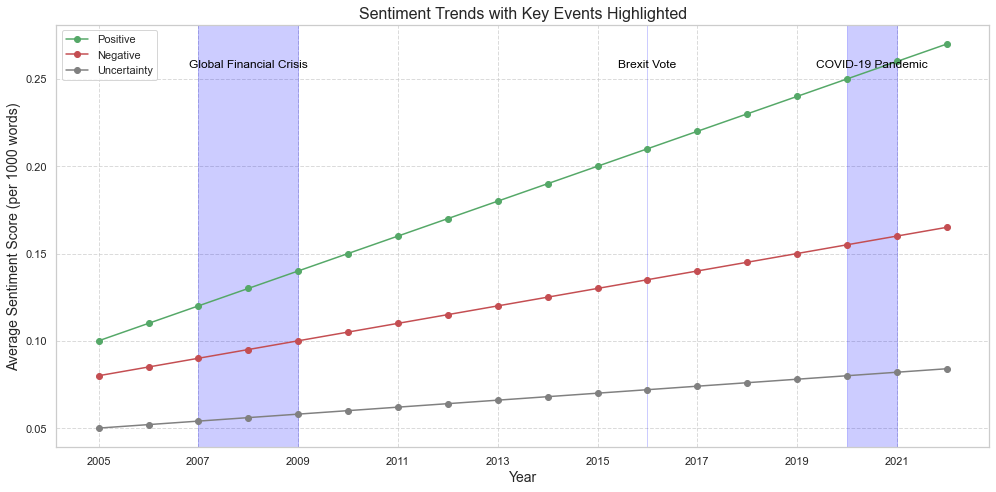

In [95]:

data = {
    'year': list(range(2005, 2023)),
    'positive_score_norm': [0.1 + (i * 0.01) for i in range(18)],
    'negative_score_norm': [0.08 + (i * 0.005) for i in range(18)],
    'uncertainty_score_norm': [0.05 + (i * 0.002) for i in range(18)]
}
yearly_sentiment = pd.DataFrame(data)

# Define key events and their periods
notable_periods = [
    {'start': 2007, 'end': 2009, 'name': 'Global Financial Crisis'},
    {'start': 2016, 'end': 2016, 'name': 'Brexit Vote'},
    {'start': 2020, 'end': 2021, 'name': 'COVID-19 Pandemic'}
]

# Plotting the sentiment trends with key events highlighted
plt.figure(figsize=(14, 7))
plt.plot(yearly_sentiment['year'], yearly_sentiment['positive_score_norm'], 'g-', marker='o', label='Positive')
plt.plot(yearly_sentiment['year'], yearly_sentiment['negative_score_norm'], 'r-', marker='o', label='Negative')
plt.plot(yearly_sentiment['year'], yearly_sentiment['uncertainty_score_norm'], 'gray', marker='o', label='Uncertainty')

# Highlight key events
for period in notable_periods:
    plt.axvspan(period['start'], period['end'], alpha=0.2, color='blue')
    plt.text(period['start'] + (period['end'] - period['start']) / 2,
             max(yearly_sentiment['positive_score_norm'].max(),
                 yearly_sentiment['negative_score_norm'].max(),
                 yearly_sentiment['uncertainty_score_norm'].max()) * 0.95,
             period['name'], horizontalalignment='center', fontsize=12, color='black')

# Title and labels
plt.title('Sentiment Trends with Key Events Highlighted', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Sentiment Score (per 1000 words)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(yearly_sentiment['year'][::2])  # Show every other year for clarity
plt.tight_layout()

# Save and show the plot
plt.savefig('sentiment_trends_with_events.png', dpi=300)
plt.show()


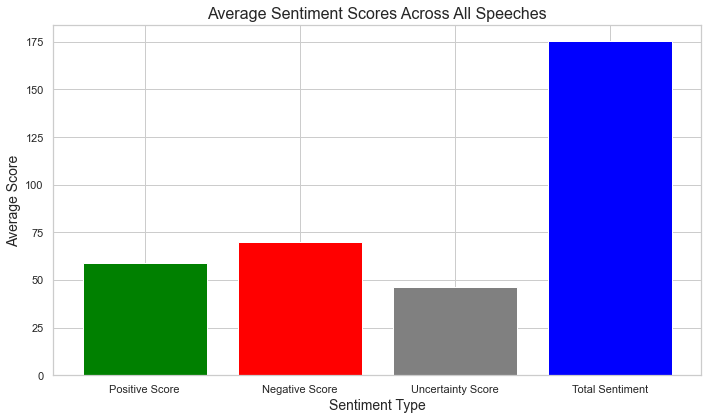

In [96]:
# Data for average sentiment scores
average_sentiments = {
    'Positive Score': 59.07,
    'Negative Score': 70.02,
    'Uncertainty Score': 46.09,
    'Total Sentiment': 175.18
}

# Plotting the average sentiment scores
plt.figure(figsize=(10, 6))
plt.bar(average_sentiments.keys(), average_sentiments.values(), color=['green', 'red', 'gray', 'blue'])

# Adding labels and title
plt.xlabel('Sentiment Type', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.title('Average Sentiment Scores Across All Speeches', fontsize=16)

# Display the plot
plt.tight_layout()
plt.savefig('average_sentiment_scores.png', dpi=300)
plt.show()


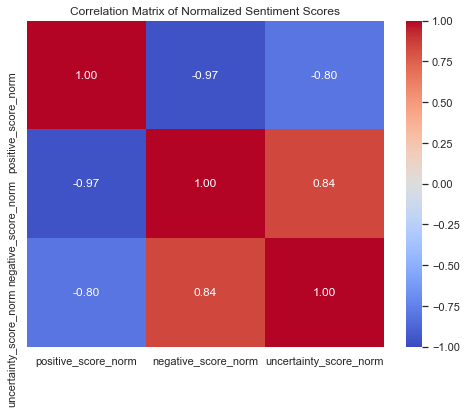

In [97]:

results_df = pd.DataFrame({
    'speech_id': [1, 2, 3, 4, 5],
    'positive_score': [0.5, -0.3, 0.7, -0.2, 0.3],
    'negative_score': [-0.2, 0.4, -0.5, 0.6, -0.1],
    'uncertainty_score': [0.1, 0.3, 0.2, 0.4, 0.2]
})

# Normalize the sentiment scores using Min-Max normalization
results_df['positive_score_norm'] = (results_df['positive_score'] - results_df['positive_score'].min()) / (results_df['positive_score'].max() - results_df['positive_score'].min())
results_df['negative_score_norm'] = (results_df['negative_score'] - results_df['negative_score'].min()) / (results_df['negative_score'].max() - results_df['negative_score'].min())
results_df['uncertainty_score_norm'] = (results_df['uncertainty_score'] - results_df['uncertainty_score'].min()) / (results_df['uncertainty_score'].max() - results_df['uncertainty_score'].min())

# Calculate the correlation matrix for the normalized sentiment types
sentiment_columns = ['positive_score_norm', 'negative_score_norm', 'uncertainty_score_norm']
correlation_matrix = results_df[sentiment_columns].corr()

# Plotting the correlation matrix as a heatmap
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Normalized Sentiment Scores')
plt.show()



In [98]:
print(yearly_sentiment.columns)


Index(['year', 'positive_score_norm', 'negative_score_norm',
       'uncertainty_score_norm'],
      dtype='object')
